<a href="https://colab.research.google.com/github/gsurend4/BackPropogration/blob/main/Intro_to_BackPropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Requirements

import math

In [5]:
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        # Lambda is a anonymous function (to handle edge cases in leaf node)
        self._backward = lambda : None # Setting up here just to handle the lead node
        self._op = _op
        self.label = label
        self.grad = 0 # Intially setting there is no Impact of this Variable to the Output Function (loss). ex : y = 5

    def __repr__(self):
        return (f'Value(data = {self.data})')

    def __add__(self, other):

        # Wrapping not Value objects inside a Value object
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            # We are adding this becuase we want to ocumulate the gradients when reffered multiple times instead of overwriting it.
            # think as if you are going back from child to its parents and update the parents local derivative

            self.grad += 1.0 * out.grad # Since sum operator is just a distributer
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):

        # Wrapping not Value objects inside a Value object
        other = other if isinstance(other, Value) else Value(other)

        out =  Value(self.data * other.data, (self, other), '*')

        def _backward():
            # think as if you are going back from child to its parents and update the parents local derivative

            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    # Reflective Methods -- Similar to except block in try exception method
    # rmul is called 'r' reflective method -> It is used to flip over the operands i.e 2 * a --> a ** 2 : a.__mul(2)
    def __rmul__(self, other):
        return self * other  #  a ** 2 : a.__mul(2) is called

    def __radd__(self, other):
        return self + other  # 2 + a --> a + 2 : a.__mul(2)

    def __pow__(self, other): # here other is x ** -1 , x --> self, -1 --> other
        assert isinstance(other, (int, float)) # other is just a --> (int, float)

        out = Value(self.data ** other, (self, ),  f'**{other}')

        def _backward():
            # power rule --> n * x^-1
            self.grad += other * (self.data ** (other - 1)) * out.grad # local derivative * out.grad is becuase of the chain rule

        out._backward = _backward

        return out

    def __truediv__(self, other):
        return self * (other ** -1)

    def __neg__(self):
        return self * -1 # call __mul__ method : self.__mul__(-1)

    def __sub__(self, other):
        return self + (-other) # call 1. __neg__ method for negating and then call 2. __add__ method : self.__add__(other)

    def tanh(self):
        #tanh = e^x - e^-x / e^x + e^-x or tanh = (e2x − 1 / e2x +1) (There are many forms)
        t = (math.exp(self.data) - math.exp(-self.data)) / (math.exp(self.data) + math.exp(-self.data))
        out = Value(t, _children=(self, ), _op='tanh')

        def _backward():
            # dif tanh = 1 - tan**2
            local_gradient = (1 - t**2)
            self.grad += local_gradient * out.grad # Reverting to assignment

        out._backward = _backward

        return out

    def exp(self):
        out = Value(math.exp(self.data), (self, ), _op='exp')

        def _backward():
            self.grad += out.data * out.grad # this is becuase diff e^x is e^x (local derivate) * chain rule

        out._backward = _backward

        return out

    def backward(self): # Back Propogation/ Chain rule

        # Topological Sort
        # finding all the child nodes and having them in topo list
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) # we are append the node after all the child node are visited
        build_topo(self)

        self.grad = 1.0 # base case for final node/loss function node

        for node in reversed(topo):
            node._backward()


In [86]:
# Implementing the tanh operator
# tanh  = e2x - 1/ e2x + 1
# Create exp function
# division a / b = a * b**-1 (a * b ^ -1)

In [95]:
# Neural Net and Forward pass

# Inputs x1 & x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1 & w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b1 = Value(6.8813735870195432, label = 'b1')

# Layer1
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

#Hidden layer calculation
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

#Hidden Layer + Bias
n = x1w1x2w2 + b1; n.label = 'n'

#Activation function (tanh)
o = n.tanh(); o.label = 'o'

o.backward()

o

Value(data = 0.7071067811865477)

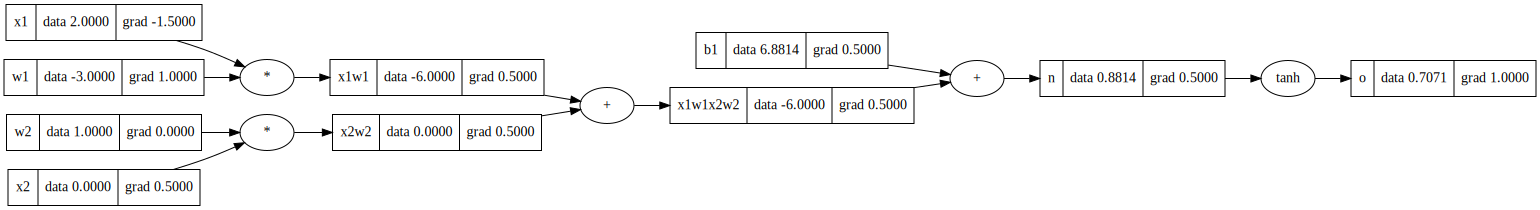

In [88]:
draw_dot(o)

In [92]:
# Redefining tanh function
# Neural Net and Forward pass

# Inputs x1 & x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1 & w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b1 = Value(6.8813735870195432, label = 'b1')

# Layer1
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

#Hidden layer calculation
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

#Hidden Layer + Bias
n = x1w1x2w2 + b1; n.label = 'n'

# Activation function (tanh)
# tanh = (e2x − 1 / e2x +1)

e = (2*n).exp()

o = (e - 1) / (e + 1)

o.backward()

o.label = 'o'
o

Value(data = 0.7071067811865477)

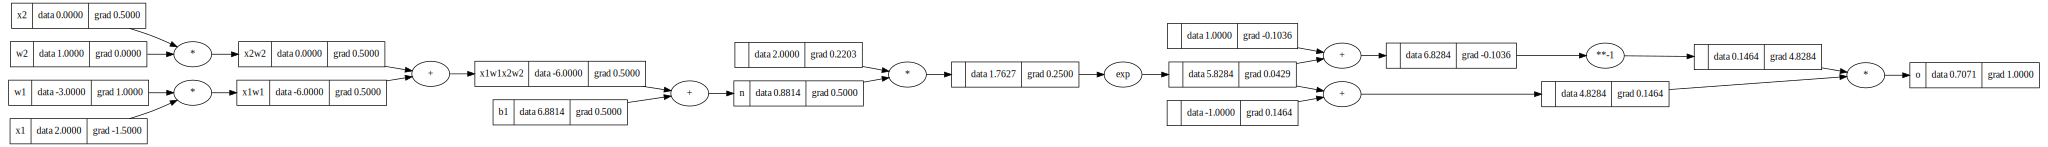

In [93]:
draw_dot(o)

In [ ]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10, label = 'c')

e = a*b; e.label = 'e'
d = e + c; d.label = 'd' # (a.__mul__(b)).__add__(c) Interally python call this way

f = Value(-2.0, label = 'f')

L = d * f; L.label = 'L'

L

Value(data = -8.0)

### graphviz (Visualization)

In [58]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

### Visualize

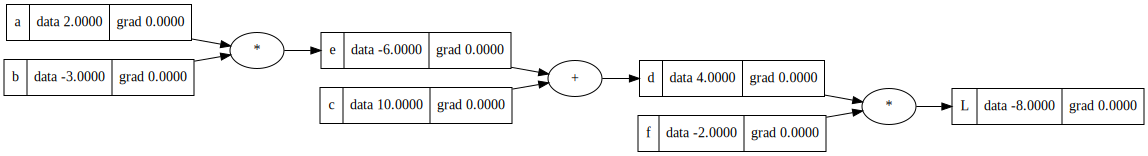

In [ ]:
draw_dot(L)

In [ ]:
# Manually Setting the Gradients so that we can validate with data

L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0

**Notes On Gradients**

1. dL/dL = 1

2. **Product Rule :**

    - dL/df = d  (L = f * d)
    - dL/dd = f  (L = f * d)

3. **Sum Rule :** (d = c + e)  based on sum rule differncing is always 1

    - dL/dc = f  (dL/dd * dd/dc)
    - Because dd/dc = 1 (Based on Sum rule)
    - f * 1 = f
    - **Sum function always acts as a Pass through. They act as a funnel through which they derivatives pass**
    - **It distributes all the derivates**

4. dL/db = a * f

    - Becuase dL/db = dL/dd * dd/c * dd/de * de/db
    - which is dL/db = f * 1 * 1 * a
    - a * f
    - Similarly `dL/da = b * f`


In [ ]:
# Testing Function

def lol():

    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0 , label = 'b')
    c = Value(10, label = 'c')

    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd' # (a.__mul__(b)).__add__(c) Interally python call this way

    f = Value(-2.0, label = 'f')

    L = d * f; L.label = 'L'

    L1 = L.data

    # --- Now we change 'a' slightly and recalculate L ---
    a = Value(2.0, label = 'a') # <--- Here's where we add 'h' to 'a'
    b = Value(-3.0 + h, label = 'b')
    c = Value(10, label = 'c')

    e = a*b; e.label = 'e';# e.data = e.data + h --> testing
    d = e + c; d.label = 'd'; #d.data = d.data + h -- Tesing

    f = Value(-2.0, label = 'f')

    L = d * f; L.label = 'L'

    L2 = L.data

    print('Derivative of L with respect to a:', (L2 - L1)/h)

lol()

Derivative of L with respect to a: -3.9999999999995595


#### Observation

- This derivative tells you how **sensitive the output L is to changes in the input a**. A derivative of approximately 6 means that if you increase `a` by a small amount, `L` will increase by approximately `6 times` that amount.

- differnectiaing `L with respect to L` which should give `1` ideally

- ex :   L1 = L.data ; L2 = L.data + h. Out = 1.0000

In [ ]:
a.data += 0.01 * a.grad # Adjusting the Input based on the sensitivity
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

print('a', a.data)
print('b', b.data)
print('c', c.data)
print('f', f.data)

e = a * b
d = c + e
L = f * d

print(L.data)

a 2.06
b -3.04
c 9.98
f -1.96
-7.286496


**Key Note :**

- The gradient tells you the sensitivity of the output (L) to changes in each input (a, b, c, f). By adjusting the inputs based on this sensitivity, you are making informed decisions about how to change them to achieve your optimization goal (maximizing or minimizing L).
- **Positive gradient:** If the gradient of L with respect to an input (say, a) is positive (a.grad > 0), it means that if you increase a, L will increase.

- **Negative gradient:** If the gradient of L with respect to an input (a) is negative (a.grad < 0), it means that if you increase a, L will decrease.

- Conclusion (L Loss Function Output):

    - **maximize** --> input.data += learning_rate * input.grad

    - **minimize** --> input.data -= learning_rate * input.grad



In [ ]:
# tanh plot

import numpy as np
import matplotlib.pyplot as plt
import math

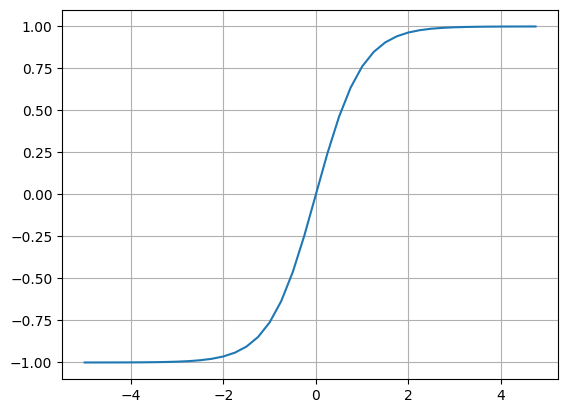

In [ ]:
plt.plot(np.arange(-5,5,0.25), np.tanh(np.arange(-5,5,0.25)))

plt.grid()

## Single Neural Network example

**Tanh - Visualization**

Reference : https://www.geeksforgeeks.org/deep-learning/tanh-activation-in-neural-network/

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250214171817652462/tanh.png" width=700>

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250214175348702686/Derivative-of-Tanh-.png" width=700>

In [ ]:
# calculating gradient Manually

o.grad = 1.0
n.grad = 1 - o.data**2
x1w1x2w2.grad = n.grad
b1.grad = n.grad
x2w2.grad =  x1w1x2w2.grad # + operators are distributers
x1w1.grad = x1w1x2w2.grad
w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad

# Local Derivative of a tanh
# do/dn = d(tanh)/dn --> 1 - tanh**2
# do/dn = 1 - o**2

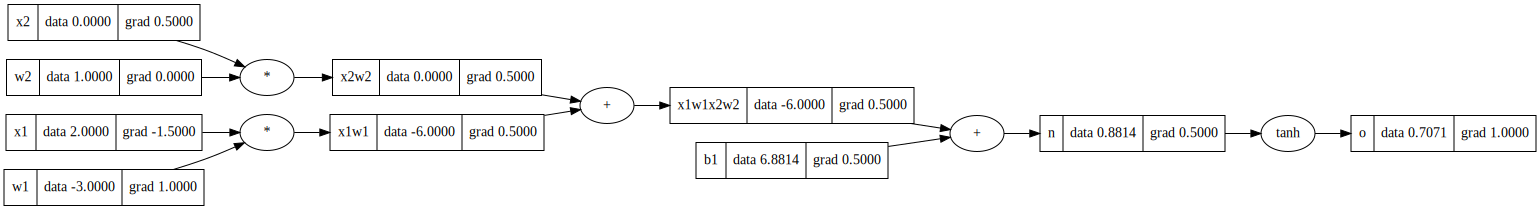

In [ ]:
draw_dot(o)

**Important Note**

When you call the _backward() function on a Value object, its primary responsibility is to update the grad attribute of its parent(s) in the computation graph.

In [ ]:
# Calling the backward function to perform the Automatic Gradient calcluation for a Single Node

o.backward()

In [61]:
# Automating in finding the local gradient using _backward function

#base case dl/dl
o.grad = 1.0 # Since we need current notes gradient to update the parent (Chain rule)

o._backward() # we are updating the gradient of n with the gradient of o.

n._backward()

x1w1x2w2._backward()

x1w1._backward()

x2w2._backward()

b1._backward()

In [ ]:
# Instead of calling it outside the function we will call inside the object.
# base case
o.grad = 1.0

# topo sort - DAG
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

# Controlling _backward function using DAG
for node in reversed(topo):
    node._backward()

In [ ]:
# Topological sort - DAG
# A node is not added untill all its child nodes are added.
# eg : Node 'o' will not be added until 'x1, w1, x2, w2, etc' are added to the list

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data = -3.0),
 Value(data = 2.0),
 Value(data = -6.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 6.881373587019543),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865477)]

## Implementing the Same with Torch API

In [2]:
import torch
import random

In [29]:
# .double() is nothing but changing precision

x1 = torch.Tensor([2.0]).double();     x1.requires_grad = True
x2 = torch.Tensor([0.0]).double();     x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double();    w1.requires_grad = True
w2 = torch.Tensor([1.0]).double();     w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()

n = x1*w1 + x2*w2 + b

o = n.tanh()

print('o' ,o.data.item())

o.backward()

print('-------')

print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())

o 0.7071066904050358
-------
x1 -1.5000003851533106
w1 1.0000002567688737
x2 0.5000001283844369
w2 0.0


In [23]:
o.data.item()

0.7071066904050358

In [25]:
class Neuron: # this is a single neuron calculation

    def __init__(self, nin) -> None: # nin -> no of input neurons n - in
       self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
       self.b = Value(random.uniform(-1,1))

    def __call__(self, inp):
        out = sum(x * w for x, w in zip(inp, self.w)) + self.b  # it will return the value object so do not want to wrap inside Value()
        return out

class Layer:

    def __init__(self, nin, nout) -> None:
        # here we are only creating the neuron not executing it
        self.neurons = [Neuron(nin) for _ in range(nout)] # for each no of output neuron we are creating a seperate neuron with the no of same inputs (fully connected)

    def __call__(self, inp):
        out = [n(inp) for n in self.neurons] # calculating values from each neurons (3 neurons from our example)
        return out

class MLP: # Multi Layer Perceptron

    def __init__(self, nin, nout) -> None: # nin -> Initially no of input values, nout --> list of no of neurons in each layer
        sz = [nin] + nout
        self.layer_neurons = [Layer(sz[i], sz[i+1]) for i in range(len(nout))]

    def __call__(self, x):
        for n in self.layer_neurons:
            x = n(x) # The output of the first layer is stored in 'x' and passed as an input to the next layer.
        return x

In [26]:
x = [2.0, 3.0, -1.0]
a = MLP(3, [4, 4, 1])

a(x)

[Value(data = 0.5375115238064703)]